# Problem Statement:

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

# Attribute Information:

ATTRIBUTES 

COMPACTNESS	(average perim)**2/area 

CIRCULARITY	(average radius)**2/area 

DISTANCE CIRCULARITY	area/(av.distance from border)**2 

RADIUS RATIO	(max.rad-min.rad)/av.radius 

PR.AXIS ASPECT RATIO	(minor axis)/(major axis) 

MAX.LENGTH ASPECT RATIO	(length perp. max length)/(max length) 

SCATTER RATIO	(inertia about minor axis)/(inertia about major axis) 

ELONGATEDNESS	area/(shrink width)**2 

PR.AXIS RECTANGULARITY	area/(pr.axis length*pr.axis width) 

MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this) 

SCALED VARIANCE (2nd order moment about minor axis)/area 
ALONG MAJOR AXIS 

SCALED VARIANCE (2nd order moment about major axis)/area 
ALONG MINOR AXIS 

SCALED RADIUS OF GYRATION	(mavar+mivar)/area 

SKEWNESS ABOUT (3rd order moment about major axis)/sigma_min**3 
MAJOR AXIS 

SKEWNESS ABOUT (3rd order moment about minor axis)/sigma_maj**3 
MINOR AXIS 

KURTOSIS ABOUT (4th order moment about major axis)/sigma_min**4 
MINOR AXIS 

KURTOSIS ABOUT (4th order moment about minor axis)/sigma_maj**4 
MAJOR AXIS 

HOLLOWS RATIO	(area of hollows)/(area of bounding polygon) 

Where sigma_maj**2 is the variance along the major axis and sigma_min**2 is the variance along the minor axis, and 

area of hollows= area of bounding poly-area of object 

The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon. 

NUMBER OF CLASSES 

4	OPEL, SAAB, BUS, VAN 

# Import libraries and Read the dataset using function .dropna() - to avoid dealing with NAs

In [50]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# Importing Data file
df = pd.read_csv('vehicle.csv').dropna()
df.shape

(813, 19)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [53]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [54]:
# 5 point summary
df.describe(include='all')

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,car
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,413
mean,93.656827,44.803198,82.04305,169.098401,61.774908,8.599016,168.563346,40.98893,20.558426,147.891759,188.377614,438.382534,174.252153,72.399754,6.351784,12.687577,188.979090,195.729397,NaN
std,8.233751,6.146659,15.78307,33.615402,7.973000,4.677174,33.082186,7.80338,2.573184,14.504648,31.165873,175.270368,32.332161,7.475994,4.921476,8.926951,6.153681,7.398781,NaN
min,73.000000,33.000000,40.00000,104.000000,47.000000,2.000000,112.000000,26.00000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,NaN
25%,87.000000,40.000000,70.00000,141.000000,57.000000,7.000000,146.000000,33.00000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000,NaN
50%,93.000000,44.000000,79.00000,167.000000,61.000000,8.000000,157.000000,43.00000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000,NaN
75%,100.000000,49.000000,98.00000,195.000000,65.000000,10.000000,198.000000,46.00000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000,NaN


In [55]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


# Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [56]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

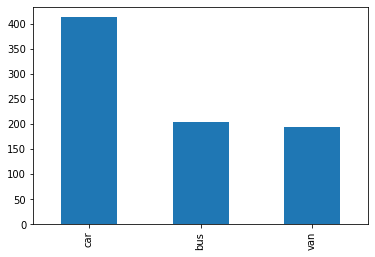

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(df["class"]).plot(kind="bar")

As the model was not deemed to distinguish between the two cars,Saab 9000 and an Opel Manta 400.The number of entries classified under the class 'car' was double the number of entries that were classified under bus and van

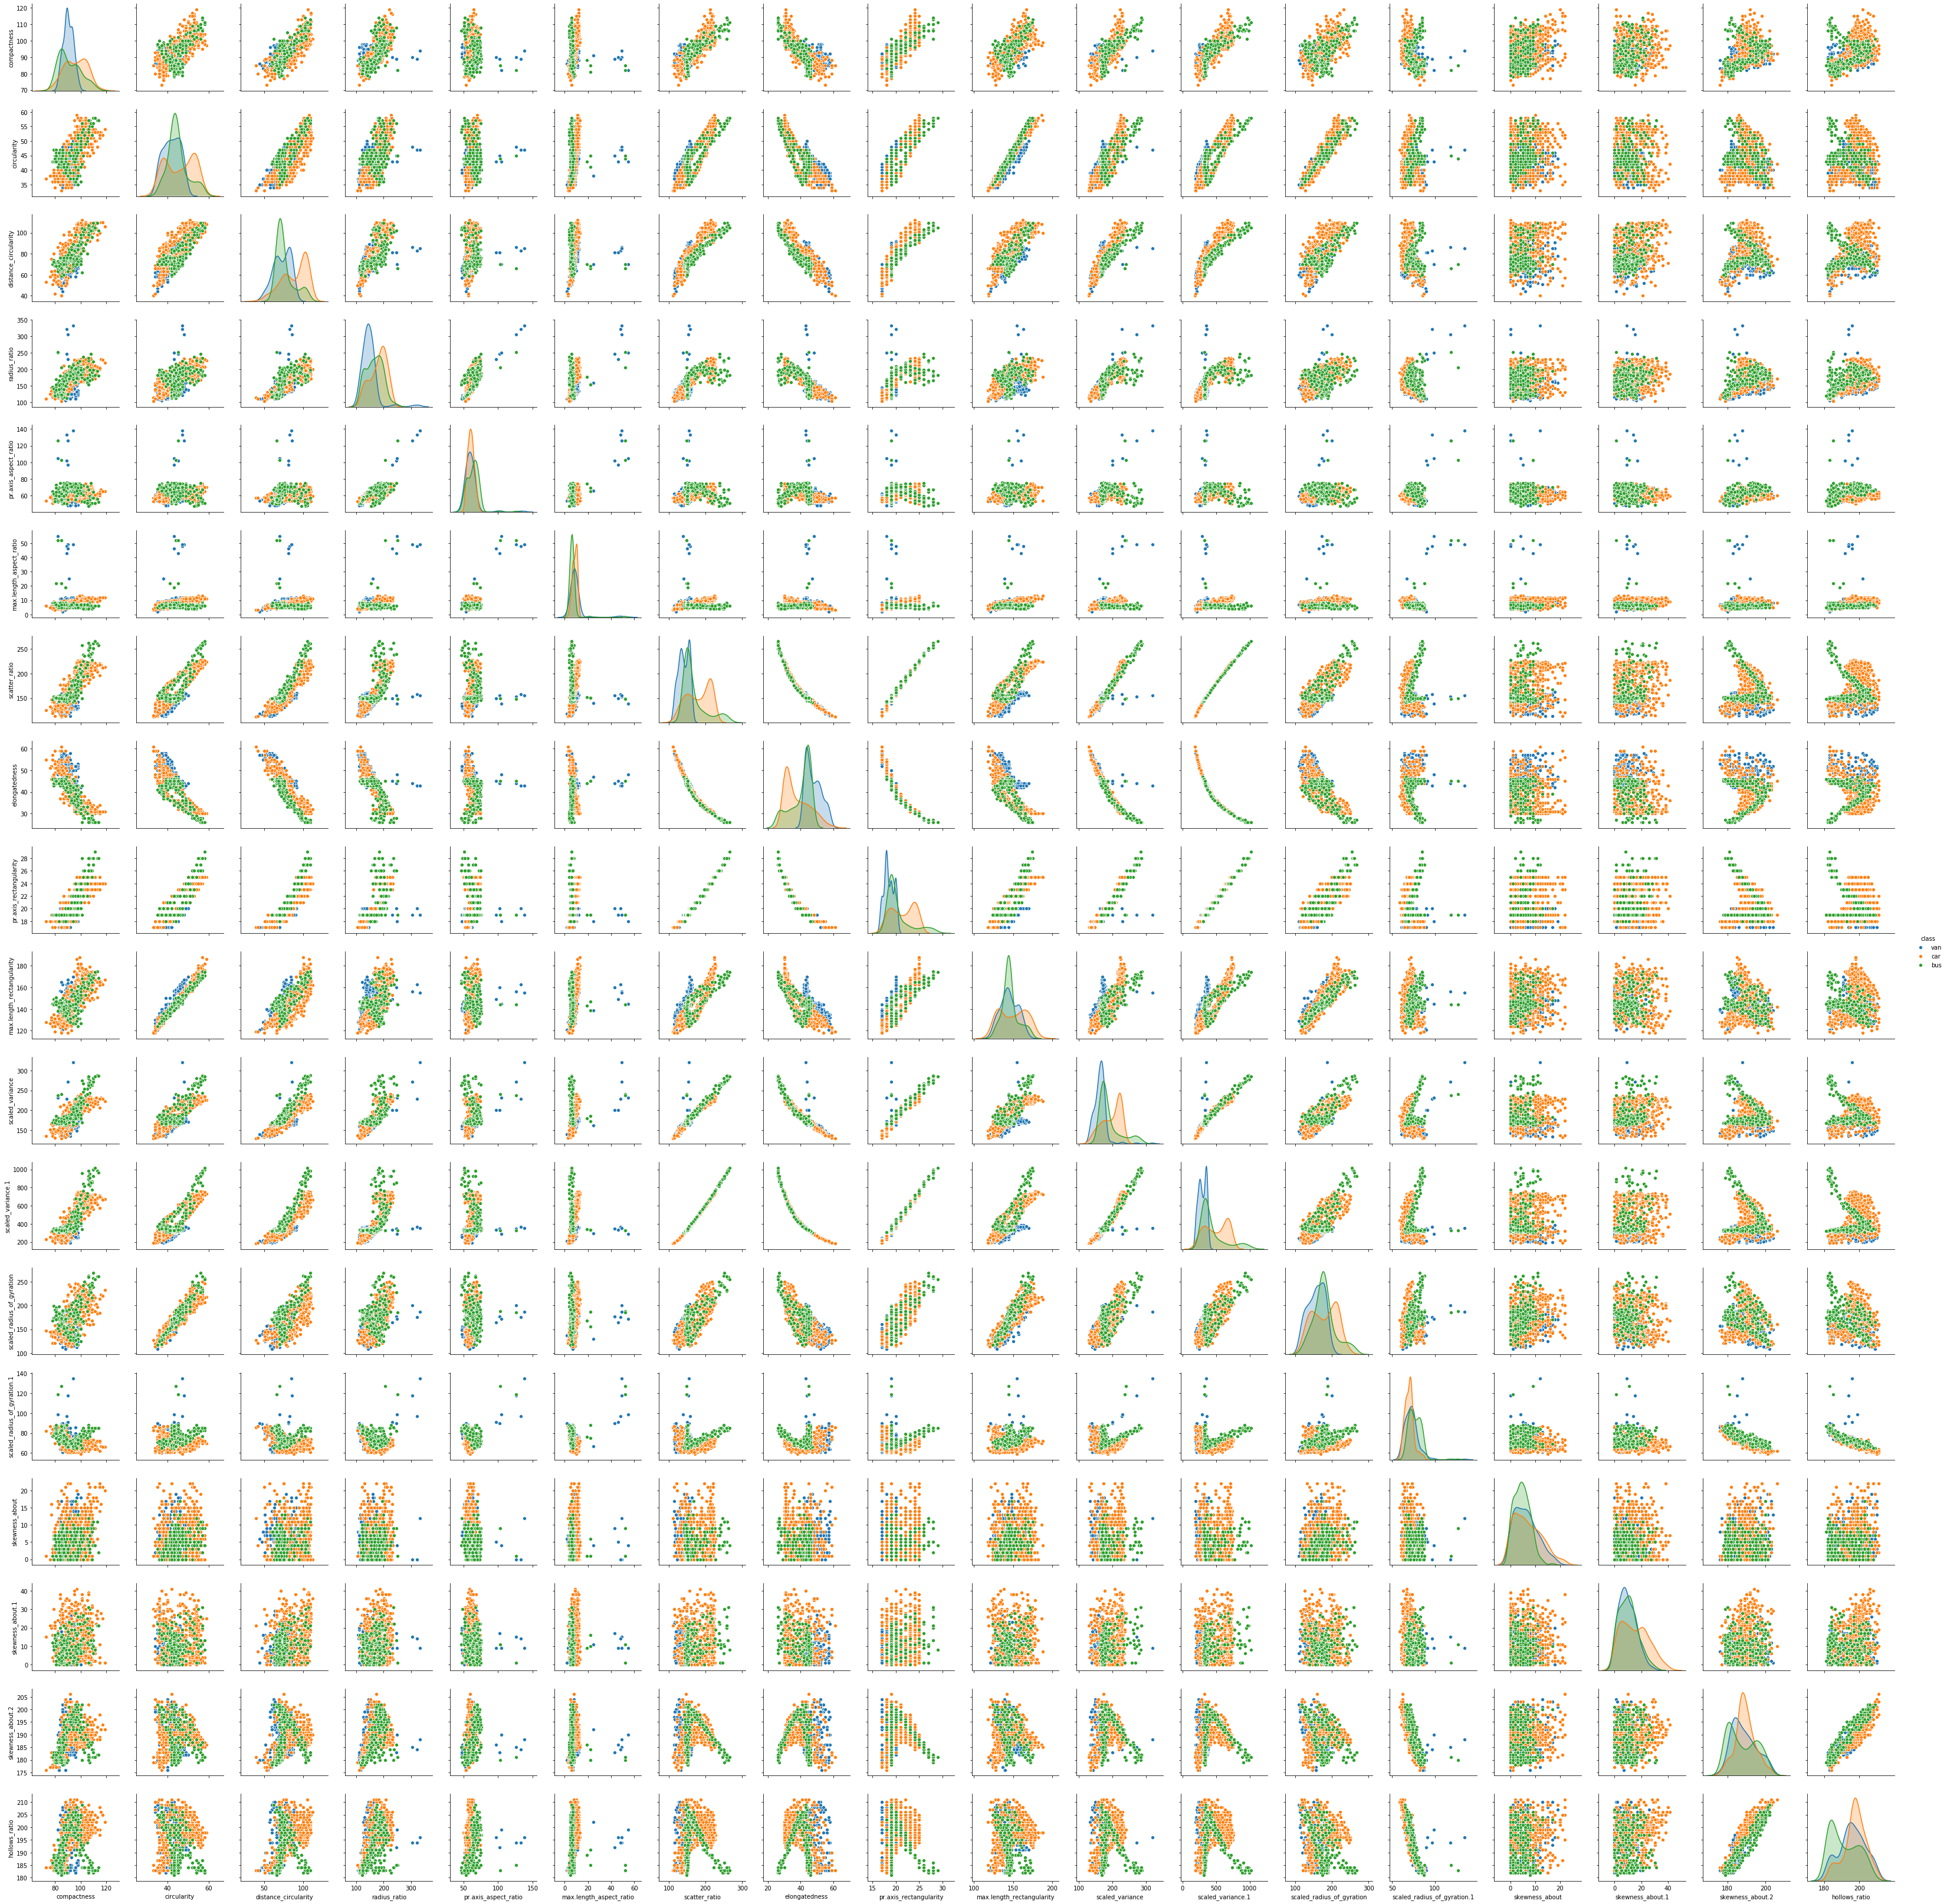

In [58]:
sns.pairplot(df,hue='class')

Here,we see that when we use hue in order to distinguish between the classes,we see that the there is a clear distinction in the peaks of some of the attributes for the three different classes and hence these can be helpful in classification of the entries.

We can also see high correlation in many of the attributes hence reducing the dimensionality of the data set by dropping highly co-related data point or with the use of PCA is extremely important for this purpose.

In [59]:
df.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895
pr.axis_aspect_ratio,0.090557,0.155023,0.163386,0.667375,1.000000,0.652093,0.113696,-0.191193,0.086992,0.133553,0.290375,0.100668,0.135663,0.173060,-0.059244,-0.040769,0.229702,0.257566
max.length_aspect_ratio,0.150369,0.251619,0.265591,0.452460,0.652093,1.000000,0.171445,-0.183242,0.167514,0.309180,0.331124,0.150069,0.197179,0.308329,0.016461,0.041210,-0.030543,0.139283
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.795761,-0.191193,-0.183242,-0.973413,1.000000,-0.950345,-0.771099,-0.937846,-0.956858,-0.761563,0.119750,-0.046621,-0.201325,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792


From the Correlation matrix it can be seen that the variables scatter ratio,elongatedness,pr.axis_rectangularity,scaled variance and scaled variance.1 has a correlation of over 0.93 among each other including some of them that have a correlation of above 0.99.It seems that only one of the attributes can represent them within data set within negligible loss of information.Let us call this set of 5 attributes as HACS 1 (High Attribute Correlation Set).

Apart from the columns in HACS,we see high correlation between circularity and max. length rectangularity as well as scaled radius of gyration and circularity.There are correlation of above 0.86 among the three of them.Let us call them HACS 2.

We also can see that some of the attributes of HACS 1 and HACS 2 considerable correlation with each other.

In such a way we can eliminate a lot of attributes more intutive EDA or by using PCA.



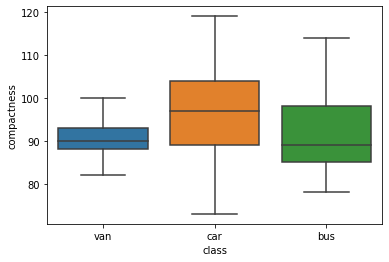

In [60]:
sns.boxplot(x= 'class',y = 'compactness',data = df)

In [61]:
df.groupby(['class']).describe()['compactness']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
bus,205.0,91.478049,8.515600,78.0,85.0,89.0,98.0,114.0
car,413.0,96.244552,8.776112,73.0,89.0,97.0,104.0,119.0
van,195.0,90.466667,3.799439,82.0,88.0,90.0,93.0,100.0


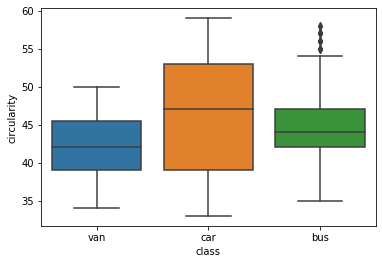

In [62]:
sns.boxplot(x= 'class',y = 'circularity',data = df)

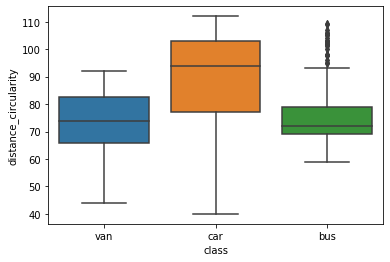

In [63]:
sns.boxplot(x= 'class',y = 'distance_circularity',data = df)

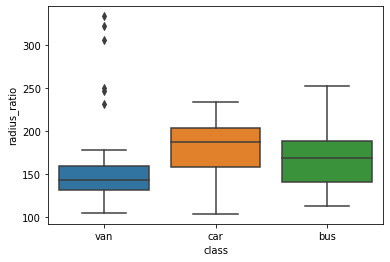

In [64]:
sns.boxplot(x= 'class',y = 'radius_ratio',data = df)

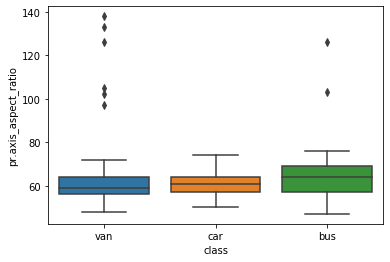

In [65]:
sns.boxplot(x= 'class',y = 'pr.axis_aspect_ratio',data = df)

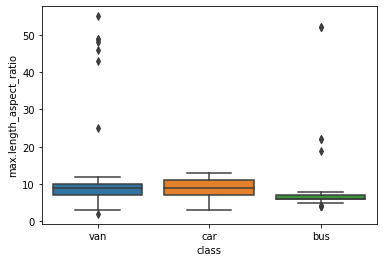

In [66]:
sns.boxplot(x= 'class',y = 'max.length_aspect_ratio',data = df)

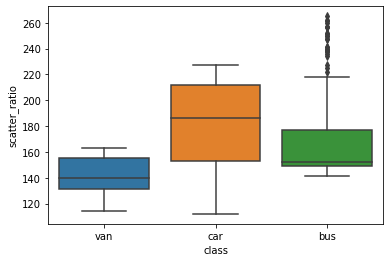

In [67]:
sns.boxplot(x= 'class',y = 'scatter_ratio',data = df)

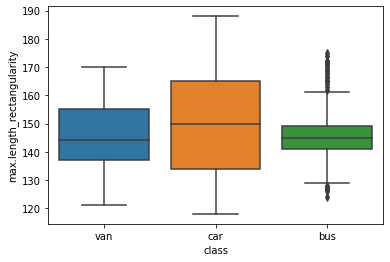

In [68]:
sns.boxplot(x= 'class',y = 'max.length_rectangularity',data = df)

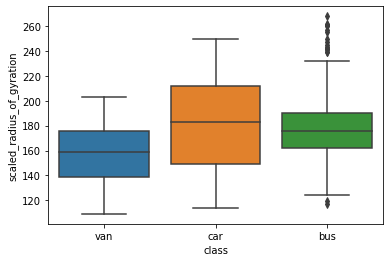

In [69]:
sns.boxplot(x= 'class',y = 'scaled_radius_of_gyration',data = df)

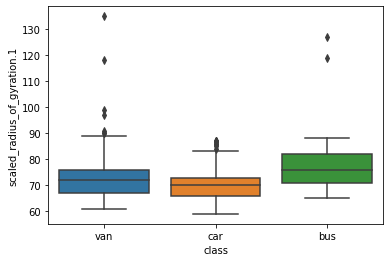

In [70]:
sns.boxplot(x= 'class',y = 'scaled_radius_of_gyration.1',data = df)

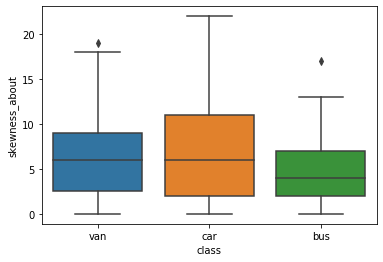

In [71]:
sns.boxplot(x= 'class',y = 'skewness_about',data = df)

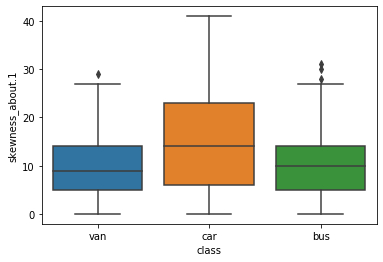

In [72]:
sns.boxplot(x= 'class',y = 'skewness_about.1',data = df)

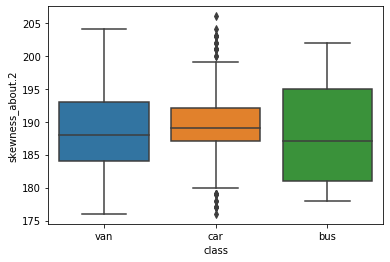

In [73]:
sns.boxplot(x= 'class',y = 'skewness_about.2',data = df)

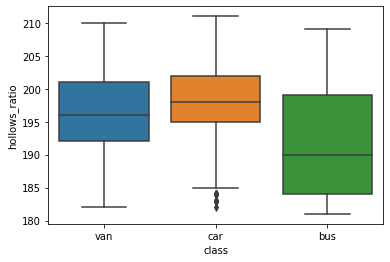

In [74]:
sns.boxplot(x= 'class',y = 'hollows_ratio',data = df)

# Q3. Standardize the data

##Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
go for any clustering methods. You can use zscore function to do this

In [75]:
interest_df = df.drop('class',axis=1)

In [76]:
target_df = df.pop("class")

In [77]:
from scipy.stats import zscore
interest_df_z = interest_df.apply(zscore)

In [78]:
interest_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [79]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = sc.fit_transform(interest_df) 

In [80]:
y = target_df.replace({'car':1,'bus':2,'van':3})

In [81]:
y.head()

0    3
1    3
2    1
3    3
4    2
Name: class, dtype: int64

In [82]:
X_std[:,:]

array([[ 0.16323063,  0.52040788,  0.06066872, ...,  0.37128716,
        -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, ...,  0.14710858,
         0.00340009,  0.44231829],
       [ 1.2569655 ,  0.84598818,  1.51882349, ..., -0.41333788,
        -0.1592043 ,  0.03659647],
       ...,
       [ 1.5000177 ,  1.49714879,  1.20183332, ..., -0.97378433,
        -0.3218087 ,  0.7127995 ],
       [-0.93050425, -1.43307395, -0.25632145, ...,  1.38009078,
         0.16600449, -0.09864413],
       [-1.05203035, -1.43307395, -1.01709784, ...,  0.59546574,
        -0.4844131 , -0.77484716]])

In [83]:
X_std.shape

(813, 18)

In [84]:
covMatrix = np.cov(X_std,rowvar=False)
print(covMatrix)

[[ 1.00123153  0.69073497  0.79092746  0.68897729  0.09066804  0.1505537
   0.81502868 -0.78902127  0.81522961  0.67573322  0.76532752  0.82125027
   0.58212123 -0.25875528  0.23193313  0.16859183  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.62471862  0.15521415  0.25192897
   0.85920548 -0.8261242   0.85719089  0.96655501  0.80710097  0.85197956
   0.93674669  0.0491303   0.1419004  -0.00197723 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.77235395  0.16358689  0.26591783
   0.91014241 -0.9138366   0.89836576  0.77441118  0.86674929  0.89288735
   0.70655787 -0.23843852  0.11041593  0.278193    0.14543699  0.34365085]
 [ 0.68897729  0.62471862  0.77235395  1.00123153  0.66819724  0.45301698
   0.74438595 -0.79674104  0.71709175  0.57118076  0.80778118  0.73267385
   0.54530637 -0.17556405  0.04474816  0.17829807  0.37605357  0.47147529]
 [ 0.09066804  0.15521415  0.16358689  0.66819724  1.00123153  0.6528959
   0.11383635 -0.19142882  0.0870987

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Eigen Values

In [86]:
print(pca.explained_variance_)

[9.45338700e+00 2.98961888e+00 1.91768721e+00 1.17011696e+00
 9.29094522e-01 5.32171101e-01 3.59073770e-01 2.22360825e-01
 1.56093142e-01 9.28191209e-02 6.35293025e-02 4.43920604e-02
 3.47623783e-02 2.12103219e-02 1.61152840e-02 1.31079986e-02
 6.26175180e-03 3.65863172e-04]


Eigen Vectors

In [87]:
print(pca.components_)

[[ 2.74447428e-01  2.94003600e-01  3.04380218e-01  2.68888600e-01
   8.30199914e-02  9.84825471e-02  3.16688948e-01 -3.13205048e-01
   3.13612229e-01  2.81285672e-01  3.09161565e-01  3.14163506e-01
   2.70337322e-01 -2.56036923e-02  3.96799548e-02  6.31600075e-02
   3.09410342e-02  7.93661290e-02]
 [-1.27105989e-01  1.34430321e-01 -7.21448351e-02 -1.76416250e-01
  -9.87633531e-02  3.02068515e-02  4.43899402e-02  1.52539710e-02
   5.72306050e-02  1.20324381e-01  6.19096771e-02  4.80210991e-02
   2.10169704e-01  4.93793797e-01 -5.62601909e-02 -1.21035426e-01
  -5.44491703e-01 -5.38881650e-01]
 [-1.15778231e-01 -3.64513515e-02 -5.51881577e-02  2.81804540e-01
   6.45768877e-01  5.86412351e-01 -9.85848213e-02  5.66515157e-02
  -1.12039253e-01 -2.41324720e-02  5.97234736e-02 -1.09452782e-01
  -3.70630986e-02  2.75779539e-01 -1.10191782e-01 -8.04993535e-02
   3.17280047e-02  5.69462532e-02]
 [ 8.00766389e-02  1.90342131e-01 -6.93709791e-02 -4.46505645e-02
   3.00532206e-02  2.97502955e-02 -9.

In [88]:
print(pca.explained_variance_ratio_)

[5.24542179e-01 1.65885645e-01 1.06407135e-01 6.49265390e-02
 5.15528736e-02 2.95286958e-02 1.99240058e-02 1.23381844e-02
 8.66117477e-03 5.15027513e-03 3.52506448e-03 2.46319209e-03
 1.92886778e-03 1.17690183e-03 8.94192335e-04 7.27326420e-04
 3.47447209e-04 2.03007309e-05]


In [89]:
np.cumsum(pca.explained_variance_ratio_)

array([0.52454218, 0.69042782, 0.79683496, 0.8617615 , 0.91331437,
       0.94284307, 0.96276707, 0.97510526, 0.98376643, 0.98891671,
       0.99244177, 0.99490496, 0.99683383, 0.99801073, 0.99890493,
       0.99963225, 0.9999797 , 1.        ])

We can see from the principle component analysis we have done that the first seven component itself will cover more than 95% variance of the data.So,we can get sufficiently accurate results by just checking the first seven components itself.A step plot depicting the same is given in the below.

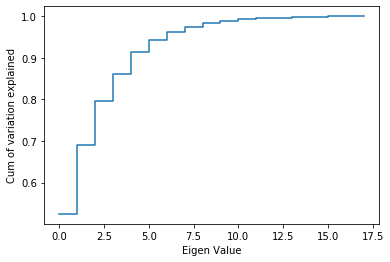

In [90]:
plt.step(list(range(0,18)),np.cumsum(pca.explained_variance_ratio_), where='post')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.show()

In [91]:
pca95 = PCA(n_components=7)
pca95.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [92]:
print(pca95.explained_variance_)

[9.453387   2.98961888 1.91768721 1.17011696 0.92909452 0.5321711
 0.35907377]


In [93]:
print(pca95.components_)

[[ 2.74447428e-01  2.94003600e-01  3.04380218e-01  2.68888600e-01
   8.30199914e-02  9.84825471e-02  3.16688948e-01 -3.13205048e-01
   3.13612229e-01  2.81285672e-01  3.09161565e-01  3.14163506e-01
   2.70337322e-01 -2.56036923e-02  3.96799548e-02  6.31600075e-02
   3.09410342e-02  7.93661290e-02]
 [-1.27105989e-01  1.34430321e-01 -7.21448351e-02 -1.76416250e-01
  -9.87633531e-02  3.02068515e-02  4.43899402e-02  1.52539710e-02
   5.72306050e-02  1.20324381e-01  6.19096771e-02  4.80210991e-02
   2.10169704e-01  4.93793797e-01 -5.62601909e-02 -1.21035426e-01
  -5.44491703e-01 -5.38881650e-01]
 [-1.15778231e-01 -3.64513515e-02 -5.51881577e-02  2.81804540e-01
   6.45768877e-01  5.86412351e-01 -9.85848213e-02  5.66515157e-02
  -1.12039253e-01 -2.41324720e-02  5.97234736e-02 -1.09452782e-01
  -3.70630986e-02  2.75779539e-01 -1.10191782e-01 -8.04993535e-02
   3.17280047e-02  5.69462532e-02]
 [ 8.00766389e-02  1.90342131e-01 -6.93709791e-02 -4.46505645e-02
   3.00532206e-02  2.97502955e-02 -9.

In [94]:
np.cumsum(pca95.explained_variance_ratio_)

array([0.52454218, 0.69042782, 0.79683496, 0.8617615 , 0.91331437,
       0.94284307, 0.96276707])

# Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [95]:
# Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = .30, random_state=0)

For the process of doing support vector Classifier (SVC) after principle component analysis(PCA),we are creating a pipeline and using number of  components as 7 for the PCA and gamma =0.025 and C=3 as a trial for our pipeline. 

In [107]:
target_names=['car','bus','van']

# Creating a pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn import svm

pipe_trial = Pipeline([ ('pca', PCA(n_components=7)), ('clf', svm.SVC(gamma=0.025 , C =3))]) 
pipe_trial.fit(X_train, y_train) 
print('Train Accuracy: %.3f' % pipe_trial.score(X_train, y_train))


Train Accuracy: 0.921


Now for tuning the hyper parameters and cross validation,we will create a pipeline pipe_svc and with the grid parameters for PCA as 7 and 8 components and SVC with parameter as 0.01,0.05,0.5 and 1 and kernal type used in the model as both rbf and linear in Grid Search Cross Validation with the number of folds as 10.

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.metrics import classification_report

pipe_svc = Pipeline([ ('pca', PCA()), ('svc', SVC())]) 


param_grid = {'pca__n_components':[7,8],'svc__C': [0.01, 0.05, 0.5, 1], 'svc__kernel':['rbf','linear']} 
grid_svc = GridSearchCV( pipe_svc , param_grid = param_grid, cv = 10) 
grid_svc.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_svc.best_score_)) 
print(" Best parameters: ", grid_svc.best_params_) 

y_pipe_svc_predict = grid_svc.predict(X_test)
print(" Test set accuracy: {:.2f}". format( grid_svc.score( X_test, y_test)))

print(classification_report(y_test, y_pipe_svc_predict, target_names=target_names))


 Best cross-validation accuracy: 0.94
 Best parameters:  {'pca__n_components': 8, 'svc__C': 1, 'svc__kernel': 'rbf'}
 Test set accuracy: 0.93
              precision    recall  f1-score   support

         car       0.92      0.96      0.94       127
         bus       0.96      1.00      0.98        51
         van       0.93      0.83      0.88        66

    accuracy                           0.93       244
   macro avg       0.94      0.93      0.93       244
weighted avg       0.93      0.93      0.93       244



It was seen that the best cross validation accuracy was obtained as 0.94 with the parameters number of PCA components as 8,C parameter in SVC as 1 and Radial Basis Function kernel type used for the algorithm .

From the classification report,it can be observed the prediction of the bus is most accurate as there is clear distinction the size of the bus in comparison to that of the car and van which are more similar to each other.The recall metric of 1 can clearly indicate the ability of the model to correctly classify the buses.

It is also seen that the among the car and van,the van is often misclassified as  a car due to its similarity in size with the car.The unbalance between the data classes making car a majority class further exacerbate the recall metric of the van class making the lowest recall of 0.83 which all other classes have a recall above 0.95.

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Instantiate the pipeline for PCA and Random Forest Classifier
pipe_naive = Pipeline([ ('pca', PCA()), ('naive', GaussianNB())]) 

# Create the parameter grid based on the results of random search 
param_grid = {
    'pca__n_components':[7,8]
}



# Instantiate the grid search model
grid_naive = GridSearchCV(estimator = pipe_naive, param_grid = param_grid, cv = 10)

grid_naive.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_naive.best_score_)) 
print(" Best parameters: ", grid_naive.best_params_) 

y_pipe_naive_predict = grid_naive.predict(X_test)


print(" Test set accuracy: {:.2f}". format( grid_naive.score( X_test, y_test)))

print(classification_report(y_test, y_pipe_naive_predict, target_names=target_names))

 Best cross-validation accuracy: 0.80
 Best parameters:  {'pca__n_components': 8}
 Test set accuracy: 0.77
              precision    recall  f1-score   support

         car       0.76      0.92      0.84       127
         bus       0.78      0.71      0.74        51
         van       0.76      0.52      0.61        66

    accuracy                           0.77       244
   macro avg       0.77      0.71      0.73       244
weighted avg       0.77      0.77      0.76       244



The best cross validation accuracy obtained was 0.80 with number of comeponents as 8 in PCA and a test accuracy of 0.77 which is quite less compared to the Support Vector Classifier which above 0.9 accuracies in test as well as cross validation.

From the classification report,it can be observed the prediction of the car is most accurate as the unbalance of number of data points within each classes favours the majority class in the naive bayes algoritm inspite of the clear distinction the size of the bus in comparison to that of the car and van.
Probabaly using upsampling,downsampling or SMOTE in Imbalanced learning library will lead to better results as even in the part the performance of recall parameter in imbalanced target classes have created problem while suing the

It is also seen that the among the car and van,the van is often misclassified as a car due to its similarity in size with the car which is same as seen with the support vector classifier.

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Instantiate the pipeline for PCA and Random Forest Classifier
pipe_rf = Pipeline([ ('pca', PCA()), ('rf', RandomForestClassifier())]) 

# Create the parameter grid based on the results of random search 
param_grid = {
    'pca__n_components':[7],
    'rf__bootstrap': [True],
    'rf__max_depth': [3, 4, 5, 6],
    'rf__max_features': [4, 5],
    'rf__min_samples_leaf': [3, 4, 5],
    'rf__min_samples_split': [8, 10, 12],
    'rf__n_estimators': [10, 20, 30, 100]
}



# Instantiate the grid search model
grid_rf = GridSearchCV(estimator = pipe_rf, param_grid = param_grid, cv = 10)

grid_rf.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid_rf.best_score_)) 
print(" Best parameters: ", grid_rf.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid_rf.score( X_test, y_test)))

 Best cross-validation accuracy: 0.86
 Best parameters:  {'pca__n_components': 7, 'rf__bootstrap': True, 'rf__max_depth': 6, 'rf__max_features': 4, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
 Test set accuracy: 0.85


The code for the random forest was taking a long time for the run and didnt give accuracies even near to that of Support Vector Classifier with the best cross validation accuracy as 0.86 at the paramters given and the test accuracy of 0.85..So,the RandomForest is effective algorithm for this dataset.